In [1]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Take grayscale image of size 512x512 and perform the following operations - 
Decrease its spatial resolution by half
every time and observe its change when displaying in the same window size
Decrease it intensity level resolution by one bit up to reach its binary format observe its change when displaying in the same window size
Illustrate the histogram of the image and make single threshold segmentation observed from the histogram


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def decrease_resolution(image):
    height, weight = image.shape
    decrease_image = np.zeros((height//2, weight//2), dtype = image.dtype)
    for r in range(0,height,2):
        for c in range(0,weight,2):
            decrease_image[r//2,c//2] = image[r,c]
    return np.uint8(decrease_image)


In [4]:
original_image = cv2.imread("1st.jpeg",cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image,(512,512))

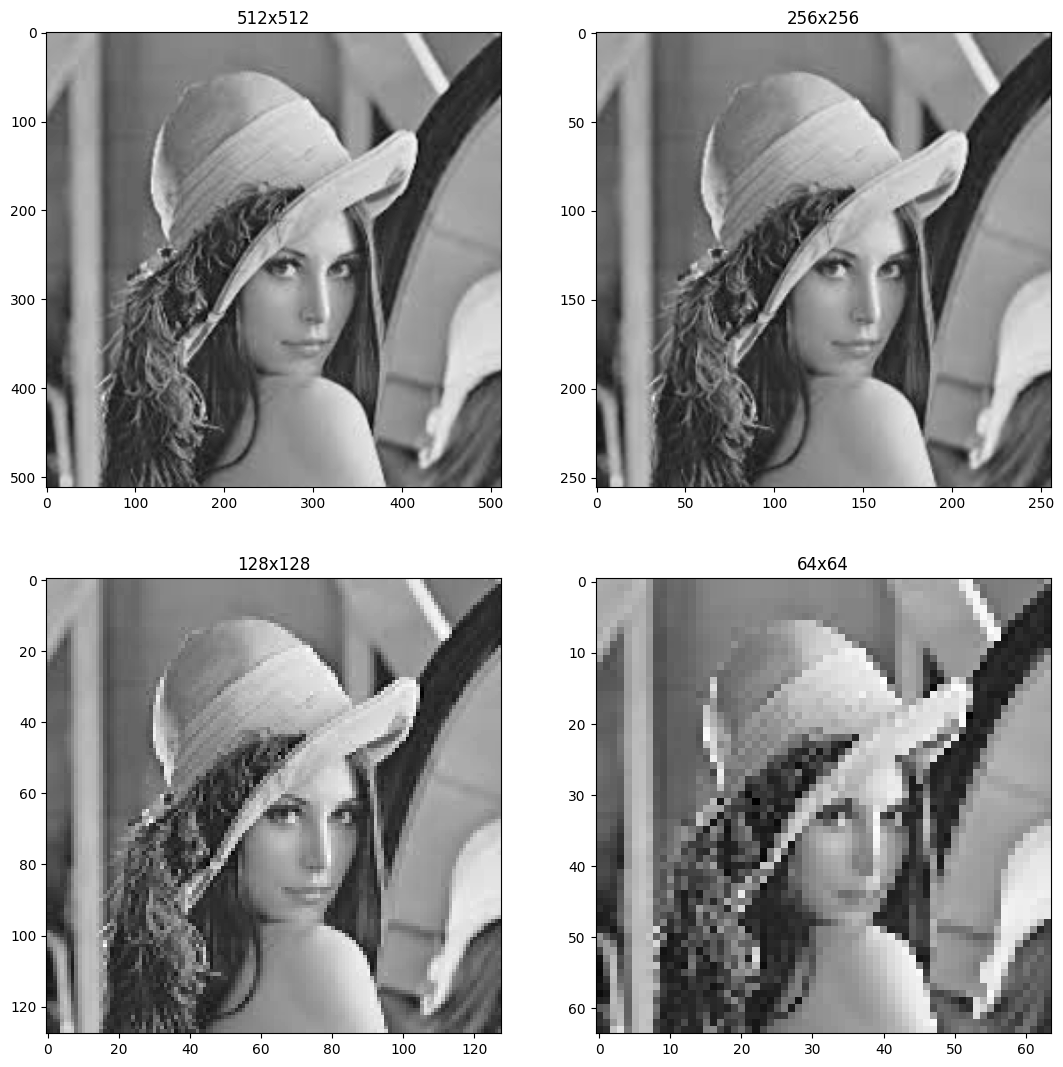

In [5]:
decrease_image = original_image.copy()
plt.figure(figsize=(13,13))

for k in range(1,5):
    plt.subplot(2,2,k)
    plt.imshow(decrease_image, cmap='gray')
    height,weight = decrease_image.shape
    plt.title(f"{height}x{weight}")
    decrease_image = decrease_resolution(decrease_image)
plt.show()

In [6]:
def decrease_intensity(image, number_bits):
    step = 255/(2**number_bits-1)
    height,weight = image.shape
    decrease_image = image.copy()
    for r in range(height):
        for c in range(weight):
            decrease_image[r,c] = round(image[r,c]/step)*step
    return decrease_image.astype(np.uint8)


In [7]:
original_image = cv2.imread("2nd.jpg",0)

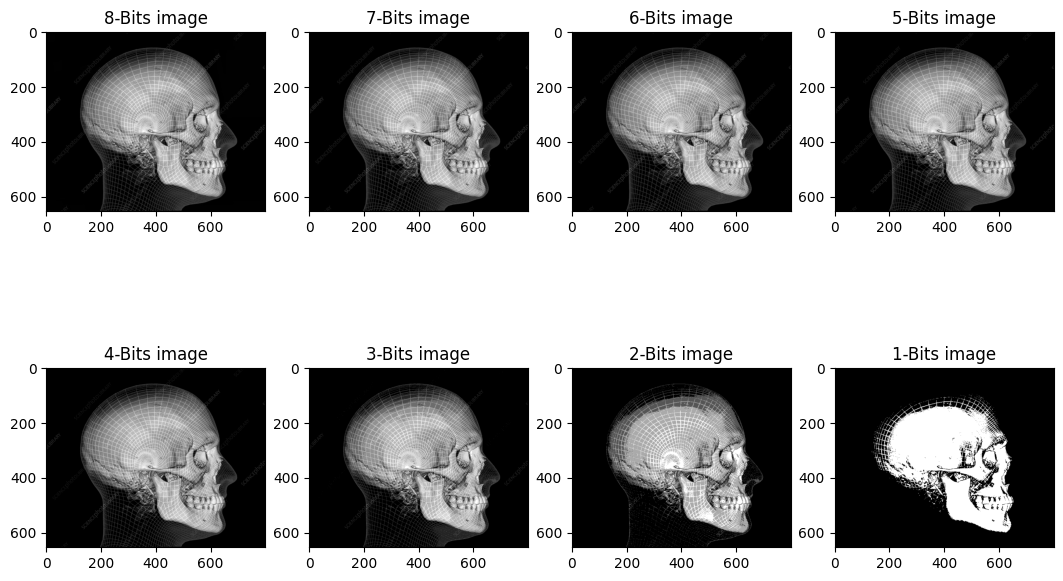

In [8]:
decrease_image = original_image.copy()
plt.figure(figsize=(13,8))

for k in range(1,9):
    plt.subplot(2,4,k)
    number_bits = 9-k
    decrease_image = decrease_intensity(decrease_image,number_bits)
    plt.imshow(decrease_image, cmap='gray')
    plt.title(f"{number_bits}-Bits image")
plt.show()


In [9]:
def generate_histgram(image):
    gray_levels_count = np.zeros(256)
    height,width = image.shape
    for r in range(height):
        for c in range(width):
            gray_levels_count[image[r,c]]+=1
    plt.bar(range(256),gray_levels_count,width=1.0,color="gray")
    plt.title("Histogram")
    plt.show()


Text(0.5, 1.0, 'original_image')

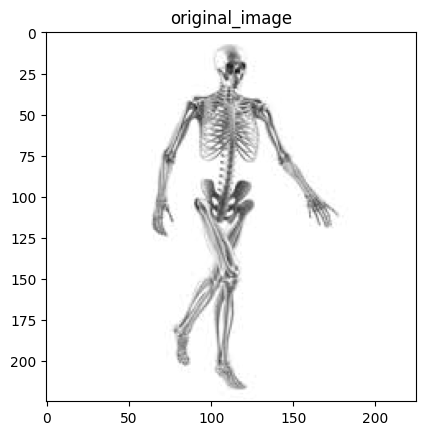

In [10]:
original_image = cv2.imread("3rd.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image,cmap='gray')
plt.title("original_image")

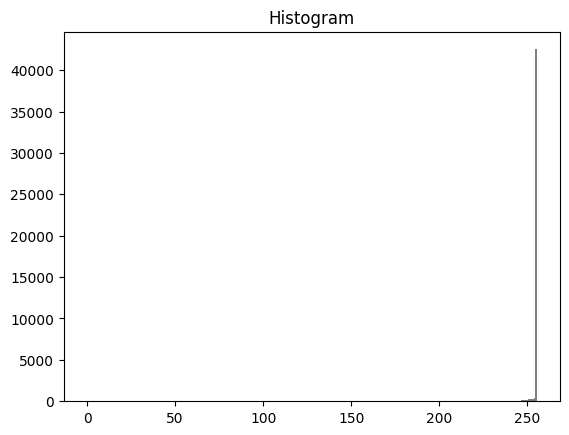

In [11]:
generate_histgram(original_image)

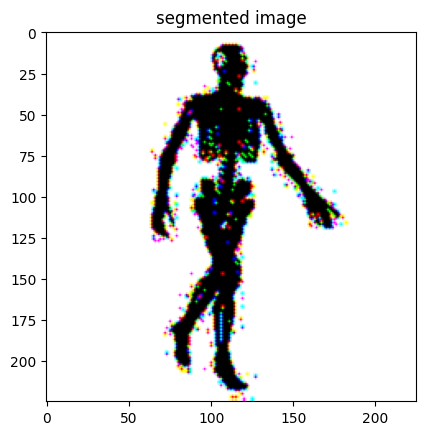

In [12]:
threshold_intensity = 250

segment_image = np.where(original_image<threshold_intensity,0,255)
segment_image = np.uint8(segment_image)
plt.imshow(cv2.cvtColor(segment_image,cv2.COLOR_BAYER_BG2BGR))
plt.title("segmented image")
plt.show()

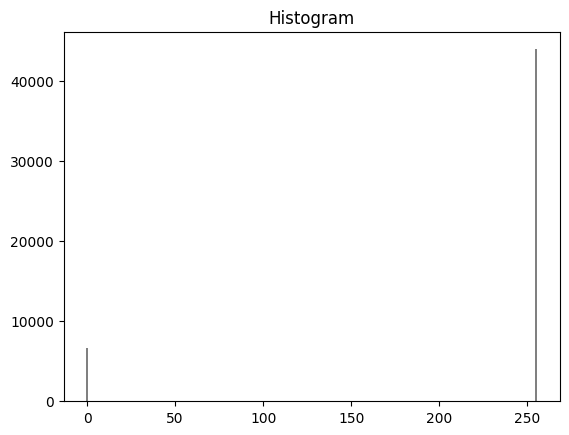

In [13]:
generate_histgram(segment_image)